In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
data = pd.read_csv("E:\\newing\\USA_Housing.csv")
data = data.rename(columns = {"Avg. Area Income": "avg_income", "Avg. Area House Age" : "avg_area_house_age", "Avg. Area Number of Rooms": "avg_number_of_room", "Avg. Area Number of Bedrooms": "avg_bedrooms", "Area Population":"population", "Price": "price"})

print(data.head())


    avg_income  avg_area_house_age  avg_number_of_room  avg_bedrooms  \
0  79545.45857            5.682861            7.009188          4.09   
1  79248.64245            6.002900            6.730821          3.09   
2  61287.06718            5.865890            8.512727          5.13   
3  63345.24005            7.188236            5.586729          3.26   
4  59982.19723            5.040555            7.839388          4.23   

    population         price  \
0  23086.80050  1.059034e+06   
1  40173.07217  1.505891e+06   
2  36882.15940  1.058988e+06   
3  34310.24283  1.260617e+06   
4  26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386  


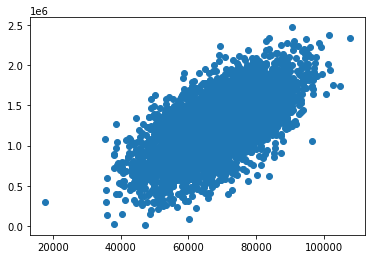

<Figure size 432x288 with 0 Axes>

In [5]:
plt.scatter(data.avg_income,data.price)
plt.show()
plt.clf()

Intercept    -221579.478223
avg_income        21.195483
dtype: float64
1 unit increase in average income increase 21.195483172213535


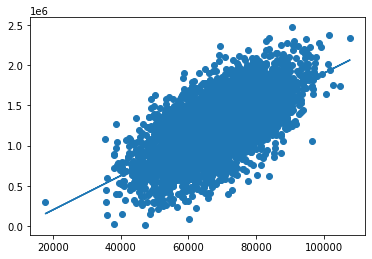

In [6]:
linear_model = sm.OLS.from_formula('price ~ avg_income', data)
results = linear_model.fit()
print(results.params)
print('1 unit increase in average income increase '+ str(results.params[1]))

plt.scatter(data.avg_income, data.price)
plt.plot(data.avg_income, results.predict(data))

In [7]:
#predict

predict = results.params[1]*7000 + results.params[0]
print(predict)

-73211.09601702911


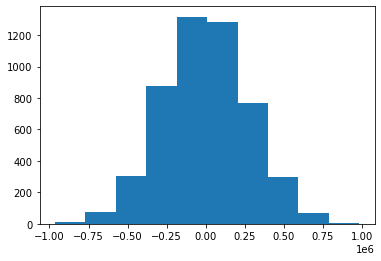

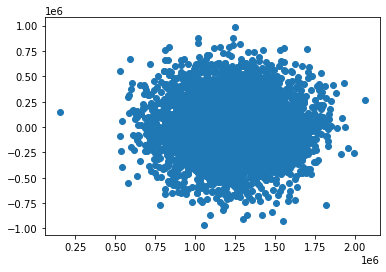

In [9]:
#calculate residuals: normal is good :D
fitted_values = results.predict(data)
residual = data.price - fitted_values
plt.hist(residual)
plt.show()

#homoscedasticity: random is good :D
plt.scatter(fitted_values, residual)
plt.show()